In [ ]:
!pip install "gspread==6.1.3"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.9 MB/s eta 0:00:00
  Attempting uninstall: gspread
    Found existing installation: gspread 6.1.4
    Uninstalling gspread-6.1.4:
      Successfully uninstalled gspread-6.1.4


In [ ]:
sheets_link = "https://docs.google.com/spreadsheets/d/1pPddxC4NHOInTeO2IfNzHOHsLWVEGtshseqXhA2YJ8M/edit?gid=0#gid=0"

In [ ]:
import gspread

key = "GOOGLE_API_KEY"
gc = gspread.api_key(key)

sh = gc.open_by_key("1pPddxC4NHOInTeO2IfNzHOHsLWVEGtshseqXhA2YJ8M")

In [ ]:
#Using pandas to read from google sheets
import pandas as pd

worksheet = sh.sheet1

data = worksheet.get_all_values()

df = pd.DataFrame(data[1:], columns=data[0])

df.head(10)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,,,
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,,,
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,,,,
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\n\nI am reaching out to ...","Dear <name>,\n\n\nWe appreciate you reaching o...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,,,
9,1033012757171,Anmeldeprobleme mit Microsoft Surface Pro 7,"Sehr geehrter Tech Online Store Support,\n\n\n...","Sehr geehrter <name>,\n\n\nVielen Dank, dass S...",Problem,Technical Support,high,de,Tech Online Store,Login Issue,Technical Support,Product Support,Warranty Claim,Technical Guidance,Problem Resolution,,,


In [ ]:
#subject: Brief summary of the ticket issue.
#body: Detailed description of the customer's problem.
#answer: Respond given by the helpdesk team.
#type: Type of ticket (e.g., Incident, Request, Problem).
#queue: The team or department responsible (e.g., Technical Support, Sales).
#priority: Urgency level (e.g., high, medium, low).
#language: Language in which the ticket is written (e.g., English, German).
#tags: Various tags associated with the ticket, describing key issues or contexts.

In [ ]:
#1. Cluster the data (eg: 'subject', 'body')

In [ ]:
df.shape

(1566, 18)

In [ ]:
#Taking only eng
df_en = df.loc[df["language"].eq("en"), :]
df_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,


In [ ]:
df_en.shape

(339, 18)

In [ ]:
tickets = df_en.loc[:, ["subject", "body"]].apply(lambda x: f"Subject: {x['subject']} \n\n\n Body: {x['body']}", axis=1)

In [ ]:
print(tickets[0])

Subject: Urgent: Critical impact on enterprise network connectivity 


 Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>


In [ ]:
# by tfidf vectorization we are converting text into numerical data, removing stop words from data

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


def preprocess_text(text):
    # Tokenize the text
    tokens = nltk.word_tokenize(text.lower())

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    stop_words.remove("not")
    stop_words.remove("don't")
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(tokens)

preprocessed_tokens = tickets.apply(preprocess_text)

# Use TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_tokens)

# Now you have the tfidf_matrix
tfidf_matrix

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<339x2177 sparse matrix of type '<class 'numpy.float64'>'
	with 21680 stored elements in Compressed Sparse Row format>

In [ ]:
print(tfidf_matrix)

  (0, 1906)	0.03152999621276293
  (0, 2087)	0.06463088382228098
  (0, 461)	0.0783564609603881
  (0, 948)	0.10146440135014362
  (0, 675)	0.26421432370476094
  (0, 1264)	0.2555642937911353
  (0, 390)	0.18784298031983482
  (0, 251)	0.03152999621276293
  (0, 484)	0.03986732209168727
  (0, 467)	0.04412938234169935
  (0, 1927)	0.06991044161631792
  (0, 1956)	0.0990956405835185
  (0, 746)	0.06516530333172225
  (0, 352)	0.14975184552658669
  (0, 1348)	0.11382548689296532
  (0, 92)	0.16837412318551911
  (0, 1075)	0.14975184552658669
  (0, 311)	0.09672600405715231
  (0, 1734)	0.09600114463459432
  (0, 1080)	0.09600114463459432
  (0, 581)	0.07876862364269965
  (0, 462)	0.15396208983032286
  (0, 950)	0.08570079209188322
  (0, 1768)	0.15882246018147114
  (0, 2126)	0.19346170148247147
  :	:
  (338, 555)	0.13149256246568194
  (338, 1194)	0.10937511231817876
  (338, 1841)	0.15581148791084562
  (338, 1850)	0.14779236225507805
  (338, 206)	0.13369403776334243
  (338, 277)	0.12943321985578962
  (338, 63)

In [ ]:
# identifying PCA values from lemmetized data
# to reduce dimentions we use pca to get top 3 pcas on tfidf_matrix
from sklearn.decomposition import PCA
pca = PCA(n_components=3)

# Fit and transform the data
pca_result = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame from the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

# Print the top 3 principal components
print(pca_df.head())

        PC1       PC2       PC3
0 -0.118924  0.357614  0.011840
1 -0.154395 -0.063118 -0.025352
2 -0.168161 -0.254740 -0.035065
3  0.093249 -0.015693 -0.246238
4  0.212957  0.110037 -0.011752


In [ ]:
# for EDA
# Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by Each Component:\n", explained_variance)
print("\nCumulative Explained Variance:\n", explained_variance.cumsum())

Explained Variance by Each Component:
 [0.03285222 0.02779747 0.02190061]

Cumulative Explained Variance:
 [0.03285222 0.06064969 0.0825503 ]


<ipython-input-16-37136a73c95e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')


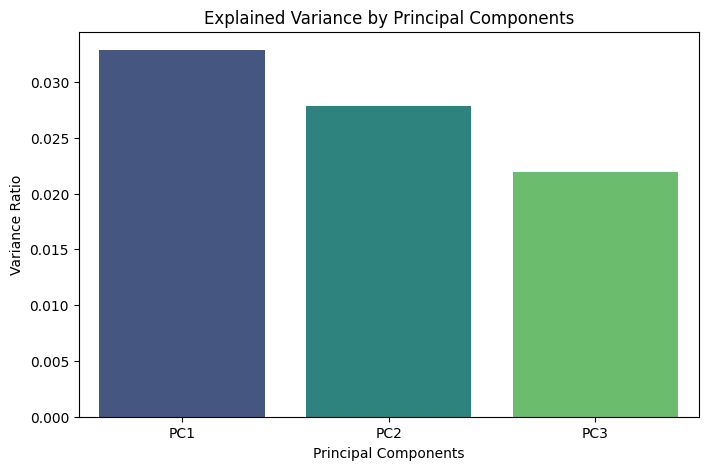

In [ ]:
# Bar Plot for Explained Variance
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.show()

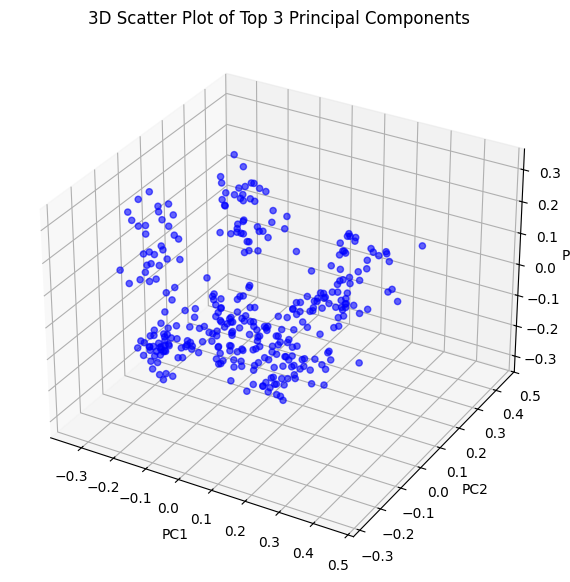

In [ ]:
# 3D Scatter Plot of PCA Results
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c='blue', alpha=0.6)

# Set labels for axes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of Top 3 Principal Components')
plt.show()


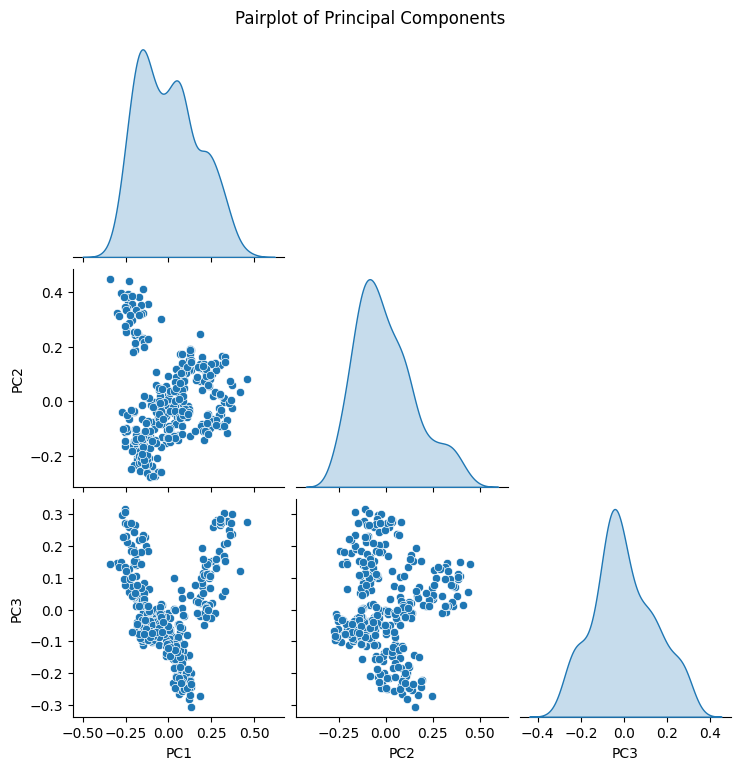

In [ ]:
sns.pairplot(pca_df, diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()

In [ ]:
# prompt: combine and tokenzie all tags columns (tag_1 to tag_9) and sort tokens and make a string of unique tokens

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Assuming df is your DataFrame and has been loaded
# ... (your existing code) ...

def preprocess_and_tokenize_tags(row):
    """Combines and tokenizes tags from tag_1 to tag_9."""
    tag_columns = [f"tag_{i}" for i in range(1, 4)]
    tags = " ".join(str(row[col]) for col in tag_columns if pd.notna(row[col]) and row[col] != '')

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    tokens = nltk.word_tokenize(tags.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]  # Keep only alphanumeric tokens

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(sorted(set(tokens)))

df_en['combined_tags'] = df_en.apply(preprocess_and_tokenize_tags, axis=1)
df_en['combined_tags'].value_counts()

<ipython-input-19-d25ae3922af0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_en['combined_tags'] = df_en.apply(preprocess_and_tokenize_tags, axis=1)


,count
combined_tags,
failure hardware product support technical,19
issue network support technical urgent,18
disruption issue service support technical urgent,17
bug product software support technical,16
bug issue software support technical urgent,12
...,...
exchange product replacement return support technical,1
guidance notification service support technical,1
customer product service support technical,1


Explained variance ratio: [0.03285222 0.02779747 0.02190061]


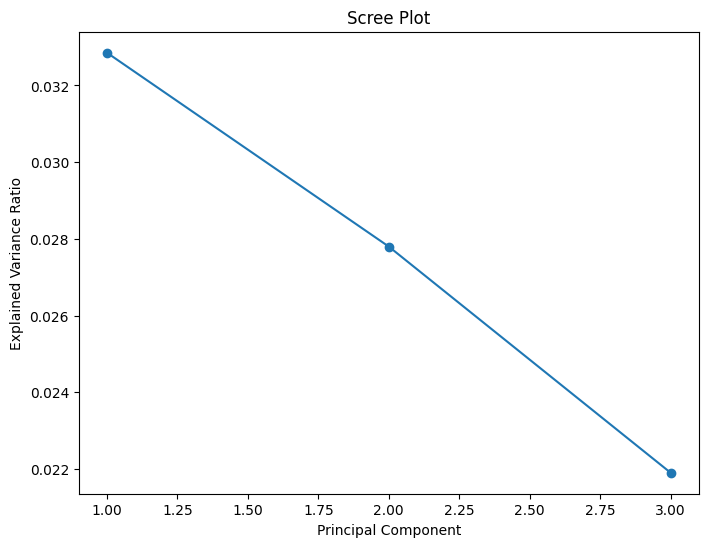

In [ ]:
# pca_result variance explained
import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()

In [ ]:
# 3d plot to plot top 3 PCAs, use df_en['tag_1'] as color
import plotly.express as px

# Assuming pca_df and df_en are already defined from the previous code

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_en['combined_tags'])
fig.update_traces(marker=dict(size=4))

fig.show()

In [ ]:
import plotly.express as px

# Assuming pca_df and df_en are already defined from the previous code

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=df_en.index)
fig.update_traces(marker=dict(size=4))

fig.show()

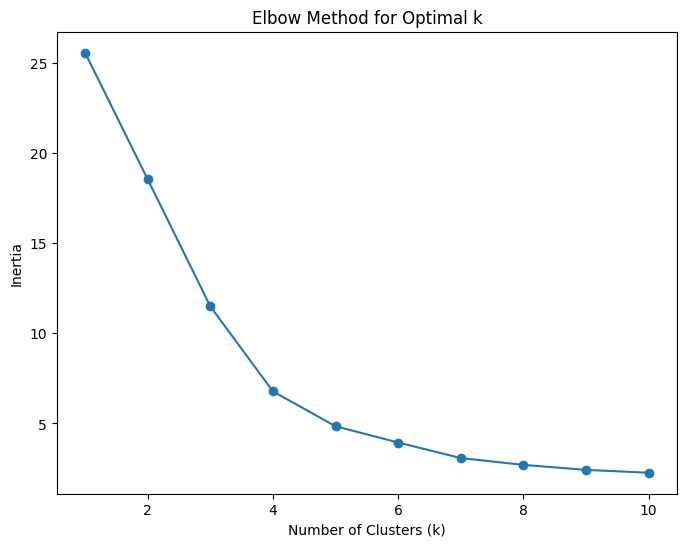

In [ ]:
# Applying K-means to Analyze the cluster distribution w.r.t PCA and combined_tags
from sklearn.cluster import KMeans
import numpy as np

# Assuming pca_df is your DataFrame with PCA components
# ... (your existing code) ...

# Calculate the inertia for different numbers of clusters
inertia = []
for k in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
# prompt: apply kmeans clusterig to above graph

from sklearn.cluster import KMeans

# Assuming pca_df is your DataFrame with PCA components
# and you want to create 5 clusters

kmeans = KMeans(n_clusters=5, random_state=42)  # You can adjust the number of clusters
kmeans.fit(pca_df)

# Add cluster labels to the pca_df
pca_df['cluster'] = kmeans.labels_

# Now you can visualize the clusters
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='cluster',hover_name = df_en.index)
fig.update_traces(marker=dict(size=4))
fig.show()

In [ ]:
# to get count of each cluster datapoints
cluster_counts = pca_df['cluster'].value_counts()
cluster_counts

,count
cluster,
0,121
2,101
3,43
4,43
1,31


In [ ]:
# List clusters with their Tags and their %occurance in clusters

# Assuming pca_df and df_en are already defined and 'cluster' column added to pca_df
# ... (your existing code) ...

cluster_tag_counts = {}

for cluster_num in pca_df['cluster'].unique():
    cluster_data = df_en.iloc[pca_df[pca_df['cluster'] == cluster_num].index]
    tag_counts = {}
    for _, row in cluster_data.iterrows():
        for i in range(1, 4):
            tag = row[f'tag_{i}']
            if pd.notna(tag) and tag != '':
                tag_counts[tag] = tag_counts.get(tag, 0) + 1
    cluster_tag_counts[cluster_num] = tag_counts


for cluster_num, tag_counts in cluster_tag_counts.items():
    total_tags_in_cluster = sum(tag_counts.values())
    print(f"Cluster {cluster_num}:")
    for tag, count in tag_counts.items():
        percentage = (count / total_tags_in_cluster) * 100
        print(f"  {tag}: {percentage:.2f}%")
    print("-" * 20)

Cluster 3:
  Service Outage: 3.88%
  Network Issue: 31.01%
  Urgent Issue: 16.28%
  Technical Support: 29.46%
  Performance Tuning: 0.78%
  Problem Resolution: 3.88%
  IT Support: 6.20%
  Hardware Failure: 2.33%
  Product Support: 0.78%
  Service Disruption: 4.65%
  Incident Report: 0.78%
--------------------
Cluster 0:
  Technical Support: 25.34%
  Product Support: 22.31%
  Hardware Failure: 8.54%
  Returns and Exchanges: 3.03%
  Product Replacement: 0.55%
  Customer Service: 3.86%
  Software Bug: 6.61%
  IT Support: 3.31%
  Network Issue: 0.55%
  Wireless Setup: 0.55%
  Billing Issue: 2.20%
  Refund Request: 1.10%
  Payment Processing: 0.83%
  Urgent Issue: 4.13%
  Problem Resolution: 3.58%
  Technical Guidance: 0.83%
  Performance Tuning: 1.38%
  General Inquiry: 2.48%
  Printer Setup: 0.55%
  Sales Inquiry: 1.65%
  Warranty Claim: 1.38%
  Login Issue: 0.55%
  Order Issue: 1.10%
  Password Reset: 0.28%
  Account Assistance: 1.10%
  Email Access: 0.28%
  Feature Request: 0.55%
  Docu

In [ ]:
#List clusters with their combined tags and their %occurance in clusters

import pandas as pd

# Assuming pca_df and df_en are already defined and 'cluster' column added to pca_df
# ... (your existing code) ...

cluster_tag_counts = {}
for cluster_num in pca_df['cluster'].unique():
    cluster_data = df_en.iloc[pca_df[pca_df['cluster'] == cluster_num].index]
    combined_tags = {}
    for _, row in cluster_data.iterrows():
      combined = row['combined_tags']
      if pd.notna(combined) and combined != '':
        combined_tags[combined] = combined_tags.get(combined, 0) + 1
    cluster_tag_counts[cluster_num] = combined_tags

cluster_tag_percentages = {}
for cluster_num, tag_counts in cluster_tag_counts.items():
    total_tags = sum(tag_counts.values())
    percentages = {}
    for tag, count in tag_counts.items():
        percentage = (count / total_tags) * 100
        percentages[tag] = percentage
    cluster_tag_percentages[cluster_num] = percentages

# Sort clusters by percentage of combined tags in descending order
sorted_clusters = sorted(cluster_tag_percentages.items(), key=lambda item: sum(item[1].values()) if item[1] else 0, reverse=True)


for cluster_num, tag_percentages in sorted_clusters:
    print(f"Cluster {cluster_num}:")
    sorted_tags = sorted(tag_percentages.items(), key=lambda item: item[1], reverse=True)
    for tag, percentage in sorted_tags:
        print(f"  {tag}: {percentage:.2f}%")
    print("-" * 20)

Cluster 0:
  failure hardware product support technical: 15.70%
  bug product software support technical: 9.92%
  product support technical: 5.79%
  bug problem resolution software support technical: 4.96%
  general inquiry product support technical: 3.31%
  issue product support technical urgent: 2.48%
  problem product resolution support technical: 2.48%
  failure hardware issue support technical urgent: 2.48%
  performance product support technical tuning: 2.48%
  exchange issue order product return support: 2.48%
  bug failure hardware software support technical: 2.48%
  product setup support technical wireless: 1.65%
  failure hardware issue product support urgent: 1.65%
  printer product setup support technical: 1.65%
  bug issue software support technical urgent: 1.65%
  claim product support technical warranty: 1.65%
  account assistance billing customer issue service: 1.65%
  customer general inquiry product service support: 1.65%
  claim exchange product return support warran

In [ ]:
df_en['cluster'] = kmeans.labels_

<ipython-input-28-49e49c23c137>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.head(20)

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,combined_tags,cluster
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,,issue network outage service urgent,3
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,,,failure hardware product support technical,0
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,,,,,customer exchange product replacement return s...,0
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,,,,performance support technical tuning,2
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,,,,issue outage service support urgent,1
8,1030547538129,Urgent Assistance Needed,"Hello Support Team,\n\n\nI am reaching out to ...","Dear <name>,\n\n\nWe appreciate you reaching o...",Request,IT Support,high,en,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Customer Service,Technical Guidance,,,,bug issue software support technical urgent,2
11,1035944507425,Bug Report: UI Bug in React App,"Hi Customer Support,\n\n\nI am reaching out to...","Hello,\n\n\nThank you for reaching out to repo...",Incident,IT Support,medium,en,IT Services,Software Bug,Technical Support,Product Support,Problem Resolution,Urgent Issue,,,,,bug product software support technical,0
13,1040536037564,Urgent: AWS Web Access Issue Resolution Required,"Dear Customer Support Team,\n\n\nI am experien...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,high,en,IT Services,Technical Support,Urgent Issue,Service Disruption,Problem Resolution,System Maintenance,,,,,disruption issue service support technical urgent,1
18,1067119038782,Issues with AWS Resource Optimization,"Dear IT Services Support,\n\n\nI am writing to...",Subject: Re: Issues with AWS Resource Optimiza...,Incident,IT Support,medium,en,IT Services,Technical Support,IT Support,Problem Resolution,Service Recovery,Performance Tuning,General Inquiry,,,,problem resolution support technical,4
20,1076159728172,Issues Setting Up AWS EC2 Security Group,"Dear Customer Support,\n\n\nI am writing to se...","Dear <name>,\n\n\nThank you for contacting us ...",Problem,Sales and Pre-Sales,low,en,IT Services,Technical Support,IT Support,Network Issue,Problem Resolution,Service Notification,Software Bug,Documentation Request,,,issue network support technical,0


In [ ]:
#2. Give Tags (with % occurrences of all product tags in it) to every cluster (Product Tag(s))

In [ ]:
df_en.loc[[52,120,127,163,171], ["subject", "body", "answer"]].values

array([['Microsoft Surface Pro 7 Touchscreen Issue - Urgent Attention Required',
        'Dear Customer Support,\n\n\nI am writing to bring to your attention an issue with my Microsoft Surface Pro 7, where the touchscreen becomes intermittently unresponsive. This problem particularly disrupts my experience during important meetings, and I am concerned about how this affects my professional commitments. Given the urgency of the situation, I would appreciate your guidance on the best course of action. \n\n\nCould you please advise if there is a known fix or if I should consider bringing the device in for repair? My Microsoft Surface Pro 7 details, including purchase and warranty information, are attached for your reference. I rely heavily on this device for work, and timely assistance would be greatly appreciated.\n\n\nThank you for your prompt attention to this matter.\n\n\nSincerely,\n<name>',
        'Dear <name>,\n\n\nThank you for reaching out regarding the touchscreen issue with yo

In [ ]:
df_en.loc[[7,8,13,24,21], ["subject", "body", "answer"]].values

array([['Immediate Attention Required: AWS Outage Concern',
        'Greetings IT Services Customer Support,\n\n\nI am <name> and I am contacting you to highlight an urgent problem with our AWS Management Service, account number <acc_num>. We have been experiencing considerable outages that are severely disrupting our operations. Given that we depend heavily on AWS for our cloud infrastructure, this interruption is significantly hindering our business continuity.\n\n\nOur team first observed the outages affecting several elements of our system since <start_time>. What we initially thought might be a minor issue has escalated; despite our efforts to resolve the matter, including restarting services and reviewing the initial support documents, the outages have continued.\n\n\nWe urgently request assistance from your expert cloud infrastructure team to examine and solve this matter. Given its time-sensitive nature, rapid intervention is crucial for the restoration of our operations. We wo

In [ ]:
df_en.loc[[0,39,63,74,78], ["subject","answer"]].values

array([['Urgent: Critical impact on enterprise network connectivity',
        "Subject: Re: Urgent: Critical impact on enterprise network connectivity\n\n\nDear <name>,\n\n\nThank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.\n\n\nWe understand the urgency and impact of this issue on your operations. Our technical support team is prioritizing your case and will promptly begin diagnosing the problem to facilitate a quick resolution.\n\n\nPlease ensure all relevant technical logs are available for our team to access, which will assist in expediting the diagnostic process. We will maintain close communication and provide updates as our investigation proceeds.\n\n\nYour patience and cooperation are greatly appreciated, and we're committed to resolving this matter as swiftly as possible.\n\n\nBest regards,\n\n\nCustomer Support Team"],
       ['Urgent: Cisco Router ISR4331 Network Connectivity Issues',
        "Dear <name>,\n\n\nThank you for 

In [ ]:
import plotly.express as px
from sklearn.manifold import TSNE

# Assuming tfidf_matrix is already defined from the previous code.

# Apply t-SNE to reduce dimensionality to 3D
tsne = TSNE(n_components=3, random_state=42)  # Initialize t-SNE with 3 components
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for Plotly Express
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

# Assuming df_en and 'combined_tags' column are already created in your code
# If not, you need to add that part from the original code before this.

# Create the 3D scatter plot using Plotly Express
fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color=df_en['combined_tags'], title='3D t-SNE of TF-IDF Matrix')
fig.show()

In [ ]:
df_en.index

Index([   0,    1,    5,    6,    7,    8,   11,   13,   18,   20,
       ...
       1435, 1440, 1447, 1498, 1512, 1517, 1528, 1536, 1537, 1561],
      dtype='int64', length=339)

In [ ]:
# use ner model on subject, to get out nouns

import spacy

# Load a spaCy NER model (you might need to download it first: python -m spacy download en_core_web_sm)
nlp = spacy.load("en_core_web_sm")

# Example usage with the first ticket subject from your code
subject = df_en.iloc[0]["subject"]  # Replace with your desired subject
doc = nlp(subject)

# Extract nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN"]
nouns

['impact', 'enterprise', 'network', 'connectivity']

In [ ]:
def get_all_pos_tags(row):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    return tokens

def get_all_ner(row):
    doc = nlp(row)

    return [(ent.text, ent.label_) for ent in doc.ents]

In [ ]:
def get_all_nouns_after(row, after=["with"]):
    doc = nlp(row)
    tokens = [(token.text, token.pos_) for token in doc]

    final_nouns = []
    curr_noun = ""
    with_occured = False
    for el in tokens:
        if el[0] in after:
            with_occured = True
        elif el[1] not in ["NOUN", "PROPN"]:
            with_occured = False

        if el[1] in ["NOUN", "PROPN"] and with_occured:
            curr_noun += " " + el[0]
        else:
            if curr_noun != "":
                final_nouns.append(curr_noun.strip())
                curr_noun = ""

    if curr_noun != "":
        final_nouns.append(curr_noun.strip())

    return final_nouns

df_en["nouns"] = df_en["subject"].apply(get_all_nouns_after)

<ipython-input-38-4214a44b3a37>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Percentage data from which products can be extracted
df_en.loc[df_en["nouns"].map(len) > 0, "nouns"].shape[0] / df_en.shape[0] * 100

17.10914454277286

In [ ]:
df_en.loc[df_en["nouns"].map(len) > 0, "nouns"]

,nouns
18,[AWS Resource Optimization]
26,[AWS Deployment]
49,[Dell XPS]
53,[Canon PIXMA MG3620 Printer]
72,[AWS Management Service Deployment]
74,[Cisco Router]
95,[HP DeskJet]
107,[AWS Management Service]
127,[Surface Pro]
129,[Dell XPS]


In [ ]:
df_en["nouns_body"] = df_en["body"].apply(get_all_nouns_after)

<ipython-input-41-721b9267c6e6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.loc[df_en["nouns_body"].map(len) > 0, "nouns_body"].shape[0] / df_en.shape[0] * 100

15.339233038348082

In [ ]:
import numpy as np
pd.Series(np.concatenate([df_en.loc[df_en["nouns_body"].map(len) > 0, "nouns_body"].index.values, df_en.loc[df_en["nouns"].map(len) > 0, "nouns"].index.values])).value_counts()

,count
613,2
892,2
18,2
1528,2
775,2
...,...
644,1
626,1
623,1
596,1


In [ ]:
105 / df_en.shape[0] * 100

30.973451327433626

In [ ]:
#getting pos tags for answer col
df_en["pos_tags"] = df_en["answer"].map(get_all_pos_tags)

<ipython-input-45-8c008088f4f9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.loc[:, ["pos_tags", "answer"]].sample(n=3).values

array([[list([('Hello', 'INTJ'), ('<', 'X'), ('name', 'NOUN'), ('>', 'X'), (',', 'PUNCT'), ('\n\n\n', 'SPACE'), ('We', 'PRON'), ('appreciate', 'VERB'), ('your', 'PRON'), ('communication', 'NOUN'), ('.', 'PUNCT'), ('We', 'PRON'), ('acknowledge', 'VERB'), ('the', 'DET'), ('urgency', 'NOUN'), ('concerning', 'VERB'), ('the', 'DET'), ('server', 'NOUN'), ('management', 'NOUN'), ('issue', 'NOUN'), ('that', 'PRON'), ('affects', 'VERB'), ('your', 'PRON'), ('ticketing', 'NOUN'), ('platform', 'NOUN'), ('and', 'CCONJ'), ('software', 'NOUN'), ('development', 'NOUN'), ('.', 'PUNCT'), ('Our', 'PRON'), ('team', 'NOUN'), ('is', 'AUX'), ('giving', 'VERB'), ('this', 'DET'), ('issue', 'NOUN'), ('top', 'ADJ'), ('priority', 'NOUN'), ('and', 'CCONJ'), ('will', 'AUX'), ('act', 'VERB'), ('quickly', 'ADV'), ('to', 'PART'), ('resolve', 'VERB'), ('it', 'PRON'), ('.', 'PUNCT'), ('We', 'PRON'), ('will', 'AUX'), ('keep', 'VERB'), ('you', 'PRON'), ('informed', 'ADJ'), ('of', 'ADP'), ('our', 'PRON'), ('progress', 'NOU

In [ ]:
df_en["ner_tags"] = df_en["answer"].map(get_all_ner)

<ipython-input-47-888e90933a4b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.loc[:, ["ner_tags", "answer"]].sample(n=3).values

array([[list([('Microsoft', 'ORG'), ('1', 'CARDINAL'), ('two', 'CARDINAL'), ('roughly 15 seconds', 'TIME'), ('a few moments', 'TIME'), ('2', 'CARDINAL'), ('the Surface Diagnostic Toolkit', 'ORG'), ('Microsoft', 'ORG'), ('3', 'CARDINAL'), ('Windows Update', 'ORG')]),
        "Dear <name>,\n\n\nThank you for contacting us about the issue with your Microsoft Surface Pro 7's unresponsive touchscreen. We apologize for the trouble you have faced, especially considering how pivotal your device is for both work and personal activities.\n\n\nTo tackle this problem, please adhere to the following instructions:  \n1. Execute a two-button shutdown by pressing and holding the power button alongside the volume-up button for roughly 15 seconds, then release. Wait a few moments before restarting the device.  \n2. Utilize the Surface Diagnostic Toolkit available on Microsoft's website, which can automatically identify and often remedy common issues.  \n3. Confirm through Windows Update that you are usi

In [ ]:
#Extracting products using bert from subject col
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tokenizer_config.json:   0%|          | 0.00/40.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [ ]:
df_en["ner_tags_bert_large"] = df_en["subject"].map(lambda x: nlp(x))
df_en.loc[:, ["ner_tags_bert_large", "subject"]].sample(n=3).values

<ipython-input-50-b1e4ef64208a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[list([]), 'Requesting Expert Guidance'],
       [list([{'entity': 'B-ORG', 'score': 0.9927279, 'index': 5, 'word': 'A', 'start': 17, 'end': 18}, {'entity': 'I-ORG', 'score': 0.9715784, 'index': 6, 'word': '##WS', 'start': 18, 'end': 20}]),
        'Urgent: Critical AWS Service Outage Experienced'],
       [list([{'entity': 'B-ORG', 'score': 0.8279117, 'index': 9, 'word': 'A', 'start': 27, 'end': 28}, {'entity': 'I-ORG', 'score': 0.6787152, 'index': 10, 'word': '##WS', 'start': 28, 'end': 30}]),
        'Request for Cost-Effective AWS Management Solutions']],
      dtype=object)

In [ ]:
df_en["products_ner_bert_large"] = df_en["ner_tags_bert_large"].map(lambda x: " ".join([el["word"] for el in x]).replace(" ##", ""))
df_en.loc[df_en["products_ner_bert_large"].map(len) > 0, ["products_ner_bert_large", "subject"]].sample(n=20)

<ipython-input-51-b7a6045e18b8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,products_ner_bert_large,subject
310,Epson EcoTk,Inquiry About Epson EcoTank ET-4760 Printer
894,Tick System,Issue with Ticket System
184,MySQL,Urgent: Assistance Needed for MySQL 8.0.30 Dat...
7,AWS,Immediate Attention Required: AWS Outage Concern
813,MacBook Air,Assistance Required for MacBook Air Activation
892,Office 365,Request for Assistance with Office 365 Install...
121,MacBook Air,Inquiry: MacBook Air M1 Graphic Design Softwar...
74,Cisco Router,Intermittent Connectivity Issues with Cisco Ro...
961,IntelliJ IDEA4,Issues with IntelliJ IDEA 2024.1 Refactoring F...
269,Inquiry,Inquiry for Professional Support


In [ ]:
#now by using body col
df_en["ner_tags_bert_large_by_body"] = df_en["body"].map(lambda x: nlp(x))
df_en.loc[:, ["ner_tags_bert_large_by_body", "body"]].sample(n=5).values

<ipython-input-52-d27c62971056>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([[list([{'entity': 'B-MISC', 'score': 0.50283056, 'index': 13, 'word': '##i', 'start': 54, 'end': 55}, {'entity': 'I-MISC', 'score': 0.6212986, 'index': 14, 'word': '-', 'start': 55, 'end': 56}, {'entity': 'I-MISC', 'score': 0.93689966, 'index': 15, 'word': 'Fi', 'start': 56, 'end': 58}, {'entity': 'B-MISC', 'score': 0.9843455, 'index': 23, 'word': 'Canon', 'start': 105, 'end': 110}, {'entity': 'I-MISC', 'score': 0.991712, 'index': 24, 'word': 'P', 'start': 111, 'end': 112}, {'entity': 'I-MISC', 'score': 0.9945945, 'index': 25, 'word': '##IX', 'start': 112, 'end': 114}, {'entity': 'I-MISC', 'score': 0.99358165, 'index': 26, 'word': '##MA', 'start': 114, 'end': 116}, {'entity': 'I-MISC', 'score': 0.97957635, 'index': 27, 'word': 'MG', 'start': 117, 'end': 119}, {'entity': 'I-MISC', 'score': 0.96048015, 'index': 28, 'word': '##36', 'start': 119, 'end': 121}, {'entity': 'I-MISC', 'score': 0.9112719, 'index': 29, 'word': '##20', 'start': 121, 'end': 123}]),
        'Dear Customer Sup

In [ ]:
df_en["products_ner_bert_large_by_body"] = df_en["ner_tags_bert_large_by_body"].map(lambda x: " ".join([el["word"] for el in x]).replace(" ##", ""))
df_en.loc[df_en["products_ner_bert_large_by_body"].map(len) > 0, ["products_ner_bert_large_by_body", "body"]].sample(n=20)

<ipython-input-53-f6749ca7609b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,products_ner_bert_large_by_body,body
1162,MySQL 8,"Dear Customer Support Team,\n\n\nI am writing ..."
468,Tech Online Store Microsoft Surface Pro 7,"Dear Tech Online Store Customer Support Team,\..."
347,Jira Software,"Dear Support Team, I am writing to request an ..."
123,Dell XPS 13 9310 Ultrabook,"Hello Customer Support,\n\n\nI am writing to s..."
1173,AWS,The customer is facing challenges in accessing...
32,Tech Online Store Support Team Google Workspac...,"Dear Tech Online Store Support Team,\n\n\nI ho..."
251,IT Services Support Team AWS AWS Management Se...,"Dear IT Services Support Team,\n\n\nI hope thi..."
506,Dell XPS 13 93 Tech Online Store,"Dear Customer Support,\n\n\nI am writing to br..."
1037,AWS AWS Management Service,"Dear Customer Support Team,\n\n\nI hope this m..."
65,Dell XPS 13 9310 Tech Online Store,"Dear Customer Support Team,\n\n\nI am reaching..."


In [ ]:
#remove repeating words from products_ner_bert_large_by_body column in each row

import pandas as pd

def remove_repeating_words(text):
    if isinstance(text, str):
        words = text.split()
        return " ".join(sorted(set(words), key=words.index))
    return text

df_en["products_ner_bert_large_by_body"] = df_en["products_ner_bert_large_by_body"].apply(remove_repeating_words)

<ipython-input-54-c05812aa5e51>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en['products'] = df_en['products_ner_bert_large_by_body']

<ipython-input-55-d734603086a3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Product percentage distribution in their respective clusters (that were extracted using 'subject' column)
import pandas as pd

# Assuming df_en and pca_df are defined as in the previous code
# and the 'cluster' column has been added to pca_df

cluster_product_counts = {}
for cluster_num in pca_df['cluster'].unique():
    cluster_data = df_en.iloc[pca_df[pca_df['cluster'] == cluster_num].index]
    product_counts = {}
    for _, row in cluster_data.iterrows():
        product = row['products_ner_bert_large']
        if pd.notna(product) and product != '':
            product_counts[product] = product_counts.get(product, 0) + 1
    cluster_product_counts[cluster_num] = product_counts

cluster_product_percentages = {}
for cluster_num, product_counts in cluster_product_counts.items():
    total_products = sum(product_counts.values())
    percentages = {}
    for product, count in product_counts.items():
        percentage = (count / total_products) * 100
        percentages[product] = percentage
    cluster_product_percentages[cluster_num] = percentages

# Sort clusters by percentage of combined tags in descending order
sorted_clusters = sorted(cluster_product_percentages.items(), key=lambda item: sum(item[1].values()) if item[1] else 0, reverse=True)

for cluster_num, product_percentages in sorted_clusters:
    print(f"Cluster {cluster_num}:")
    sorted_products = sorted(product_percentages.items(), key=lambda item: item[1], reverse=True)
    for product, percentage in sorted_products:
        print(f"  {product}: {percentage:.2f}%")
    print("-" * 20)

Cluster 0:
  Dell XPS: 17.95%
  MacBook Air: 8.97%
  MacBook Air M1: 8.97%
  HP DeskJet: 6.41%
  Surface Pro: 6.41%
  Dell XPS 13: 3.85%
  Microsoft Surface Pro 7: 3.85%
  Canon PIXMA: 2.56%
  Zoo: 2.56%
  Adobe Photoshop: 2.56%
  Epson EcoTank: 2.56%
  IntelliJ IDEA: 2.56%
  UI: 1.28%
  AWS2 Security Group: 1.28%
  Canon: 1.28%
  Zoom: 1.28%
  Microsoft Surface Pro 7 Touchscreen: 1.28%
  Canon PIXMA MG: 1.28%
  Adobe Photoshop 2024: 1.28%
  Epson EcoT: 1.28%
  Amazon Navigation: 1.28%
  Netgear: 1.28%
  Google Workspace: 1.28%
  Canon PIX: 1.28%
  LG: 1.28%
  Office 365: 1.28%
  Surface Pro 7: 1.28%
  Epson EcoTk: 1.28%
  Jira: 1.28%
  Excel: 1.28%
  S: 1.28%
  Samsung QLED: 1.28%
  Microsoft Surface Pro: 1.28%
  Canon PIXMA MG36: 1.28%
  Canon PIX Fi: 1.28%
  IntelliJ IDEA4: 1.28%
--------------------
Cluster 3:
  Cisco Router: 61.11%
  Cisco: 22.22%
  Inter: 5.56%
  Cisco Route: 5.56%
  Route: 5.56%
--------------------
Cluster 1:
  AWS: 66.67%
  A: 18.52%
  AWS Management Service: 

In [ ]:
#Product percentage distribution in their respective clusters (that were extracted using 'body' column)

import pandas as pd

# Assuming df_en and pca_df are defined as in the previous code
# and the 'cluster' column has been added to pca_df

cluster_product_counts = {}
for cluster_num in pca_df['cluster'].unique():
    cluster_data = df_en.iloc[pca_df[pca_df['cluster'] == cluster_num].index]
    product_counts = {}
    for _, row in cluster_data.iterrows():
        product = row['products']
        if pd.notna(product) and product != '':
            product_counts[product] = product_counts.get(product, 0) + 1
    cluster_product_counts[cluster_num] = product_counts

cluster_product_percentages = {}
for cluster_num, product_counts in cluster_product_counts.items():
    total_products = sum(product_counts.values())
    percentages = {}
    for product, count in product_counts.items():
        percentage = (count / total_products) * 100
        percentages[product] = percentage
    cluster_product_percentages[cluster_num] = percentages

# Sort clusters by percentage of combined tags in descending order
sorted_clusters = sorted(cluster_product_percentages.items(), key=lambda item: sum(item[1].values()) if item[1] else 0, reverse=True)

for cluster_num, product_percentages in sorted_clusters:
    print(f"Cluster {cluster_num}:")
    sorted_products = sorted(product_percentages.items(), key=lambda item: item[1], reverse=True)
    for product, percentage in sorted_products:
        print(f"  {product}: {percentage:.2f}%")
    print("-" * 20)

Cluster 2:
  Jira Software: 10.99%
  IT Consulting Service: 10.99%
  Support Team IT Consulting Service: 5.49%
  Team IT Consulting Service: 4.40%
  IT Services Support Team Consulting Service: 4.40%
  IT Services Support Consulting Service: 3.30%
  Zoom: 3.30%
  IT Support Team Consulting Service: 3.30%
  Microsoft Office 365 Excel: 2.20%
  IT Consulting Services: 2.20%
  Visual Studio Code 1 . 70: 2.20%
  AWS Management Service: 2.20%
  MySQL 8: 2.20%
  PostgreSQL MySQL 8: 2.20%
  Google Workspace Business Standard: 2.20%
  Excel Microsoft Office 365: 2.20%
  Team IT Consulting Services: 2.20%
  IT Consulting Firm JavaScript: 2.20%
  Tech Online Store Zoom: 2.20%
  IT Services Support Team MySQL: 1.10%
  JavaScript Re U: 1.10%
  Oracle Database: 1.10%
  PostgreSQL 14 3: 1.10%
  IT Consulting Firm Jira Software: 1.10%
  IT Services Support Microsoft Office 365 Excel: 1.10%
  IT Services Support Slack: 1.10%
  Jira Software Development Company: 1.10%
  Adobe Photoshop 2024 Creative Clo

In [ ]:
df_en['products'].value_counts()

,count
products,
AWS Management Service,17
,16
AWS,16
IT Consulting Service,12
Cisco Router ISR4331,12
...,...
LG OLED C1,1
HP DeskJet 3755 Wi Fi,1
HP DeskJet 3755i Fi,1


In [ ]:
#3.Find a way to get issues for every token (either using POS Tagging, NER, Dependency Parser or something else)

In [ ]:
#POS Tagging and Dependency Parser
import spacy
from collections import Counter

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Example function to extract issues using POS tagging and dependency parsing
def extract_issues(text):
    doc = nlp(text)
    issues = []

    # Extract nouns and noun phrases
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN']:  # Focus on nouns and proper nouns
            issues.append(token.text)

    # Extract key phrases (noun chunks)
    for chunk in doc.noun_chunks:
        issues.append(chunk.text)

    # Optional: Add verbs or specific adjectives related to issues
    for token in doc:
        if token.pos_ == 'VERB' and token.dep_ == 'ROOT':  # Main action verbs
            issues.append(token.text)

    return issues

# Example usage: Extract issues for each combined text
df_en['issues'] = df_en['combined_tags'].apply(extract_issues)

# Summarize the most common issues across the dataset
all_issues = [issue for issues in df_en['issues'] for issue in issues]
common_issues = Counter(all_issues).most_common(20)

print("Top 20 Issues:")
for issue, count in common_issues:
    print(f"{issue}: {count}")

Top 20 Issues:
support: 286
issue: 190
technical: 182
service: 105
product: 104
network: 51
disruption: 48
bug: 47
software: 47
failure: 35
hardware: 34
customer: 29
problem: 26
resolution: 26
inquiry: 23
outage: 20
failure hardware product: 19
bug product software support technical: 16
account: 16
assistance: 16


<ipython-input-60-f02ffbe22cb9>:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Eg:- "Server failed to respond to the payment request."
# ['server', 'payment request', 'failed']

In [ ]:
df_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,...,nouns,nouns_body,pos_tags,ner_tags,ner_tags_bert_large,products_ner_bert_large,ner_tags_bert_large_by_body,products_ner_bert_large_by_body,products,issues
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,...,[],[],"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...","[(Cisco Router ISR4331, ORG)]",[],,"[{'entity': 'B-ORG', 'score': 0.87059575, 'ind...",Cisco RouterN,Cisco RouterN,"[issue, network, outage, service, issue networ..."
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,...,[],[],"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (Dell SupportAssist, ORG), (2,...","[{'entity': 'B-MISC', 'score': 0.6436562, 'ind...",Dell XPS,"[{'entity': 'B-MISC', 'score': 0.99288625, 'in...",Dell XPS 13 9310,Dell XPS 13 9310,"[failure, hardware, product, support, technica..."
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,...,[],[],"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (2, CARDINAL), (3, CARDINAL), ...","[{'entity': 'B-MISC', 'score': 0.903875, 'inde...",Dell XPS,"[{'entity': 'B-ORG', 'score': 0.9916095, 'inde...",Tech Online Store Dell XPS 13,Tech Online Store Dell XPS 13,"[customer, exchange, product, replacement, ret..."
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,...,[],[server administration],"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...",[],[],,"[{'entity': 'B-ORG', 'score': 0.9935475, 'inde...",IT Services Support Consulting Service,IT Services Support Consulting Service,"[performance, tuning, performance support tech..."
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,...,[],[],"[(Hello, INTJ), (<, X), (name, NOUN), (>, X), ...","[(AWS, ORG), (downtime, CARDINAL)]","[{'entity': 'B-ORG', 'score': 0.9878591, 'inde...",AWS,"[{'entity': 'B-ORG', 'score': 0.98832, 'index'...",IT Services Support AWS Management Service,IT Services Support AWS Management Service,"[issue, outage, service, support]"


In [ ]:
# Through NER
# ORG: Organizations (e.g., "Microsoft", "Amazon").
# PRODUCT: Products (e.g., "Windows", "iPhone").
# EVENT: Events (e.g., "Black Friday", "Cyber Attack").
# GPE: Geopolitical entities (e.g., "New York", "India").
# LOC: Locations (e.g., "server room", "data center").
# WORK_OF_ART: Titles or names (e.g., "Server Error 404").

# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to extract issues using NER
def extract_issues_ner(text):
    doc = nlp(text)
    entities = []

    # Extract specific entity types relevant to issues
    for ent in doc.ents:
        if ent.label_ in ['ORG', 'PRODUCT', 'EVENT', 'GPE', 'LOC', 'WORK_OF_ART']:
            entities.append(ent.text)

    return entities

# Apply the function to the combined_tags column
df_en['issues_ner'] = df_en['combined_tags'].apply(lambda x: extract_issues_ner(x))

# Aggregate and summarize the most common issues across the dataset
all_entities = [entity for entities in df_en['issues_ner'] for entity in entities]
common_entities = Counter(all_entities).most_common(20)

# Print the top 20 most frequent entities
print("Top 20 Entities (Issues):")
for entity, count in common_entities:
    print(f"{entity}: {count}")

Top 20 Entities (Issues):
bug disruption: 1


<ipython-input-63-75ea9137279a>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# "Amazon server error in New York payment delay"
# ['Amazon', 'New York']

In [ ]:
df_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,...,nouns_body,pos_tags,ner_tags,ner_tags_bert_large,products_ner_bert_large,ner_tags_bert_large_by_body,products_ner_bert_large_by_body,products,issues,issues_ner
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,...,[],"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...","[(Cisco Router ISR4331, ORG)]",[],,"[{'entity': 'B-ORG', 'score': 0.87059575, 'ind...",Cisco RouterN,Cisco RouterN,"[issue, network, outage, service, issue networ...",[]
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,...,[],"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (Dell SupportAssist, ORG), (2,...","[{'entity': 'B-MISC', 'score': 0.6436562, 'ind...",Dell XPS,"[{'entity': 'B-MISC', 'score': 0.99288625, 'in...",Dell XPS 13 9310,Dell XPS 13 9310,"[failure, hardware, product, support, technica...",[]
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,...,[],"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (2, CARDINAL), (3, CARDINAL), ...","[{'entity': 'B-MISC', 'score': 0.903875, 'inde...",Dell XPS,"[{'entity': 'B-ORG', 'score': 0.9916095, 'inde...",Tech Online Store Dell XPS 13,Tech Online Store Dell XPS 13,"[customer, exchange, product, replacement, ret...",[]
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,...,[server administration],"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...",[],[],,"[{'entity': 'B-ORG', 'score': 0.9935475, 'inde...",IT Services Support Consulting Service,IT Services Support Consulting Service,"[performance, tuning, performance support tech...",[]
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,...,[],"[(Hello, INTJ), (<, X), (name, NOUN), (>, X), ...","[(AWS, ORG), (downtime, CARDINAL)]","[{'entity': 'B-ORG', 'score': 0.9878591, 'inde...",AWS,"[{'entity': 'B-ORG', 'score': 0.98832, 'index'...",IT Services Support AWS Management Service,IT Services Support AWS Management Service,"[issue, outage, service, support]",[]


In [ ]:
# merging NER, POS and Dependency

# Example function to extract issues using POS tagging and dependency parsing
def extract_issues(text):
    doc = nlp(text)
    issues = []

    # Extract nouns and noun phrases
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN']:  # Focus on nouns and proper nouns
            issues.append(token.text)

    # Extract key phrases (noun chunks)
    for chunk in doc.noun_chunks:
        issues.append(chunk.text)

    # Optional: Add verbs or specific adjectives related to issues
    for token in doc:
        if token.pos_ == 'VERB' and token.dep_ == 'ROOT':  # Main action verbs
            issues.append(token.text)

    for ent in doc.ents:
        if ent.label_ in ['PRODUCT', 'ORG', 'GPE']:
            issues.append(ent.text)

    return issues

# Example usage: Extract issues for each combined text
df_en['issues_comb'] = df_en['combined_tags'].apply(extract_issues)

# Summarize the most common issues across the dataset
all_issues = [issue for issues in df_en['issues_comb'] for issue in issues]
common_issues = Counter(all_issues).most_common(20)

print("Top 20 Issues:")
for issue, count in common_issues:
    print(f"{issue}: {count}")

Top 20 Issues:
support: 286
issue: 190
technical: 182
service: 105
product: 104
network: 51
disruption: 48
bug: 47
software: 47
failure: 35
hardware: 34
customer: 29
problem: 26
resolution: 26
inquiry: 23
outage: 20
failure hardware product: 19
bug product software support technical: 16
account: 16
assistance: 16


<ipython-input-66-d30af20149e4>:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,...,pos_tags,ner_tags,ner_tags_bert_large,products_ner_bert_large,ner_tags_bert_large_by_body,products_ner_bert_large_by_body,products,issues,issues_ner,issues_comb
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,...,"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...","[(Cisco Router ISR4331, ORG)]",[],,"[{'entity': 'B-ORG', 'score': 0.87059575, 'ind...",Cisco RouterN,Cisco RouterN,"[issue, network, outage, service, issue networ...",[],"[issue, network, outage, service, issue networ..."
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,...,"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (Dell SupportAssist, ORG), (2,...","[{'entity': 'B-MISC', 'score': 0.6436562, 'ind...",Dell XPS,"[{'entity': 'B-MISC', 'score': 0.99288625, 'in...",Dell XPS 13 9310,Dell XPS 13 9310,"[failure, hardware, product, support, technica...",[],"[failure, hardware, product, support, technica..."
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,...,"[(Dear, ADJ), (<, X), (name, NOUN), (>, PUNCT)...","[(1, CARDINAL), (2, CARDINAL), (3, CARDINAL), ...","[{'entity': 'B-MISC', 'score': 0.903875, 'inde...",Dell XPS,"[{'entity': 'B-ORG', 'score': 0.9916095, 'inde...",Tech Online Store Dell XPS 13,Tech Online Store Dell XPS 13,"[customer, exchange, product, replacement, ret...",[],"[customer, exchange, product, replacement, ret..."
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,...,"[(Subject, NOUN), (:, PUNCT), (Re, ADP), (:, P...",[],[],,"[{'entity': 'B-ORG', 'score': 0.9935475, 'inde...",IT Services Support Consulting Service,IT Services Support Consulting Service,"[performance, tuning, performance support tech...",[],"[performance, tuning, performance support tech..."
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,...,"[(Hello, INTJ), (<, X), (name, NOUN), (>, X), ...","[(AWS, ORG), (downtime, CARDINAL)]","[{'entity': 'B-ORG', 'score': 0.9878591, 'inde...",AWS,"[{'entity': 'B-ORG', 'score': 0.98832, 'index'...",IT Services Support AWS Management Service,IT Services Support AWS Management Service,"[issue, outage, service, support]",[],"[issue, outage, service, support]"


In [ ]:
print(df_en['issues'].iloc[0])
print(df_en['issues_comb'].iloc[0])

['issue', 'network', 'outage', 'service', 'issue network outage service']
['issue', 'network', 'outage', 'service', 'issue network outage service']


In [ ]:
# Function to extract the main issue
def extract_main_error(text):
    doc = nlp(text)
    main_issue = ""

    for token in doc:
        # Focus on the main verb (ROOT) and its dependencies
        if token.dep_ == 'ROOT':
            main_issue = token.text  # The main action (verb)
            # Include direct objects (dobj) or noun phrases (nsubj)
            main_issue += " " + " ".join(child.text for child in token.children if child.dep_ in ['dobj', 'nsubj', 'prep', 'pobj'])
            break

    return main_issue.strip()

# Apply the function to the combined_tags column
df_en['main_issue'] = df_en['combined_tags'].apply(lambda x: extract_main_error(x))

<ipython-input-69-beafb13601ae>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,...,ner_tags,ner_tags_bert_large,products_ner_bert_large,ner_tags_bert_large_by_body,products_ner_bert_large_by_body,products,issues,issues_ner,issues_comb,main_issue
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,...,"[(Cisco Router ISR4331, ORG)]",[],,"[{'entity': 'B-ORG', 'score': 0.87059575, 'ind...",Cisco RouterN,Cisco RouterN,"[issue, network, outage, service, issue networ...",[],"[issue, network, outage, service, issue networ...",service
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,...,"[(1, CARDINAL), (Dell SupportAssist, ORG), (2,...","[{'entity': 'B-MISC', 'score': 0.6436562, 'ind...",Dell XPS,"[{'entity': 'B-MISC', 'score': 0.99288625, 'in...",Dell XPS 13 9310,Dell XPS 13 9310,"[failure, hardware, product, support, technica...",[],"[failure, hardware, product, support, technica...",technical
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,...,"[(1, CARDINAL), (2, CARDINAL), (3, CARDINAL), ...","[{'entity': 'B-MISC', 'score': 0.903875, 'inde...",Dell XPS,"[{'entity': 'B-ORG', 'score': 0.9916095, 'inde...",Tech Online Store Dell XPS 13,Tech Online Store Dell XPS 13,"[customer, exchange, product, replacement, ret...",[],"[customer, exchange, product, replacement, ret...",service
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,...,[],[],,"[{'entity': 'B-ORG', 'score': 0.9935475, 'inde...",IT Services Support Consulting Service,IT Services Support Consulting Service,"[performance, tuning, performance support tech...",[],"[performance, tuning, performance support tech...",tuning
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,...,"[(AWS, ORG), (downtime, CARDINAL)]","[{'entity': 'B-ORG', 'score': 0.9878591, 'inde...",AWS,"[{'entity': 'B-ORG', 'score': 0.98832, 'index'...",IT Services Support AWS Management Service,IT Services Support AWS Management Service,"[issue, outage, service, support]",[],"[issue, outage, service, support]",support


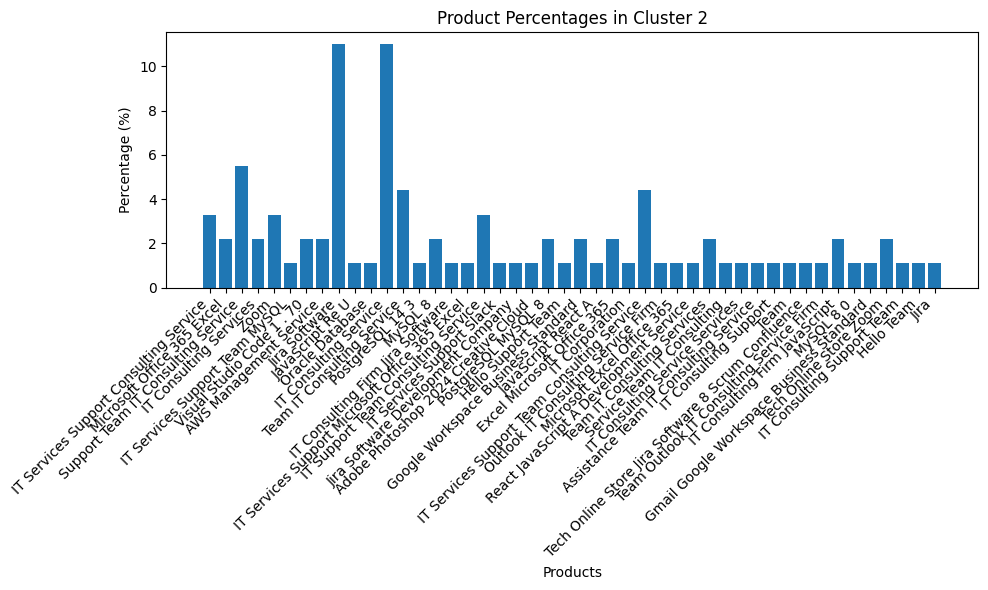

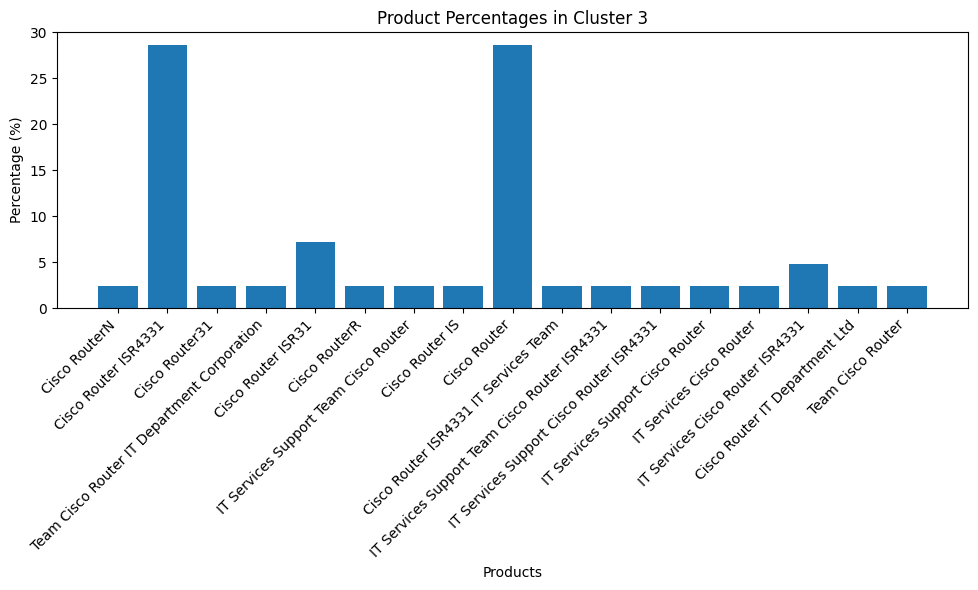

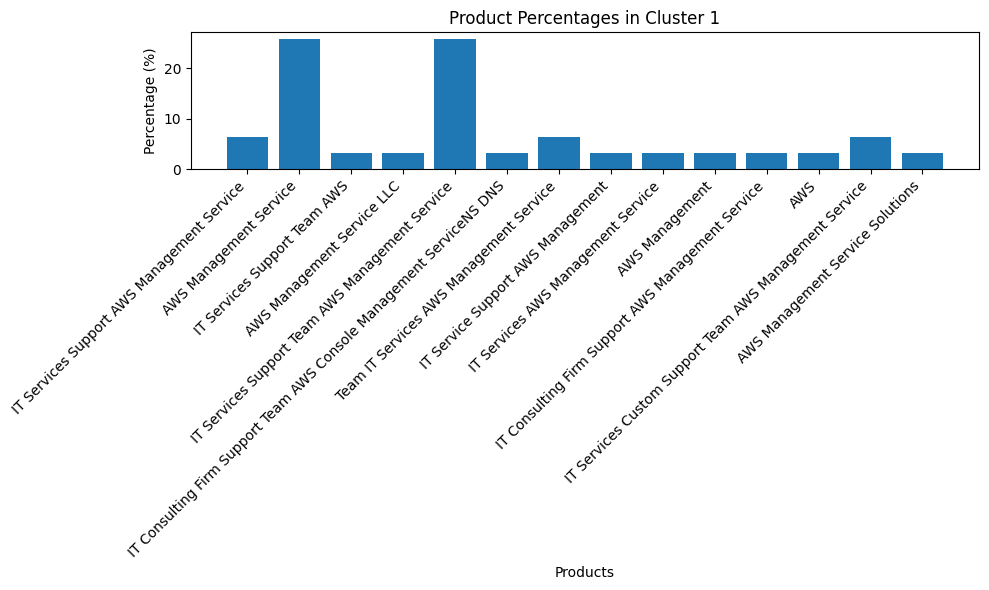

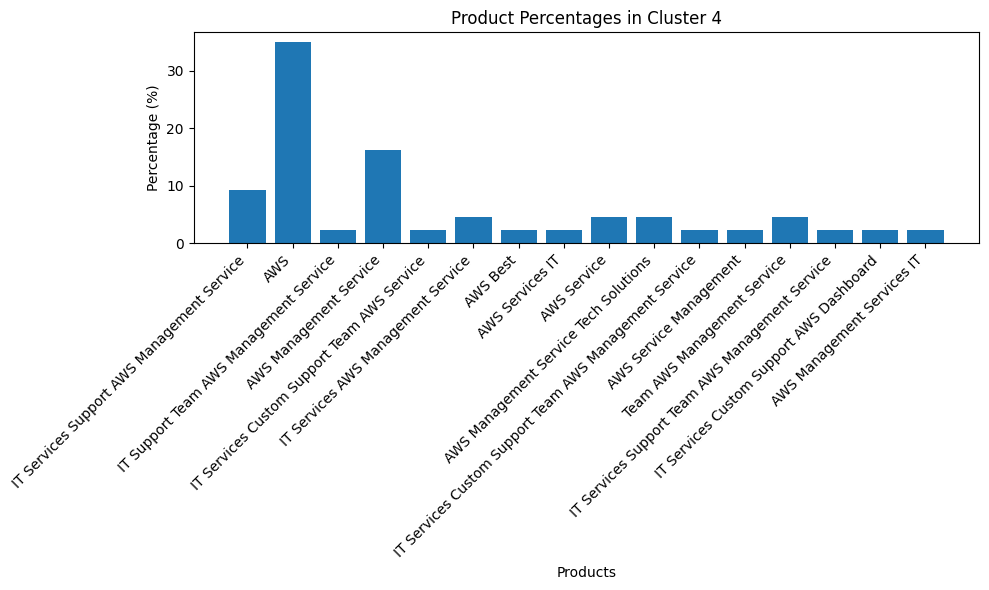

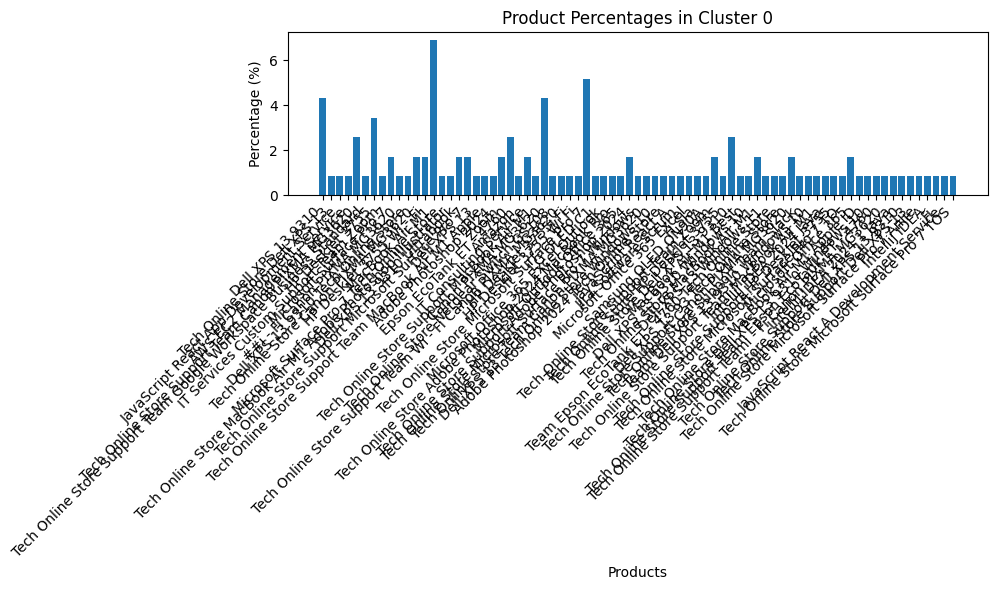

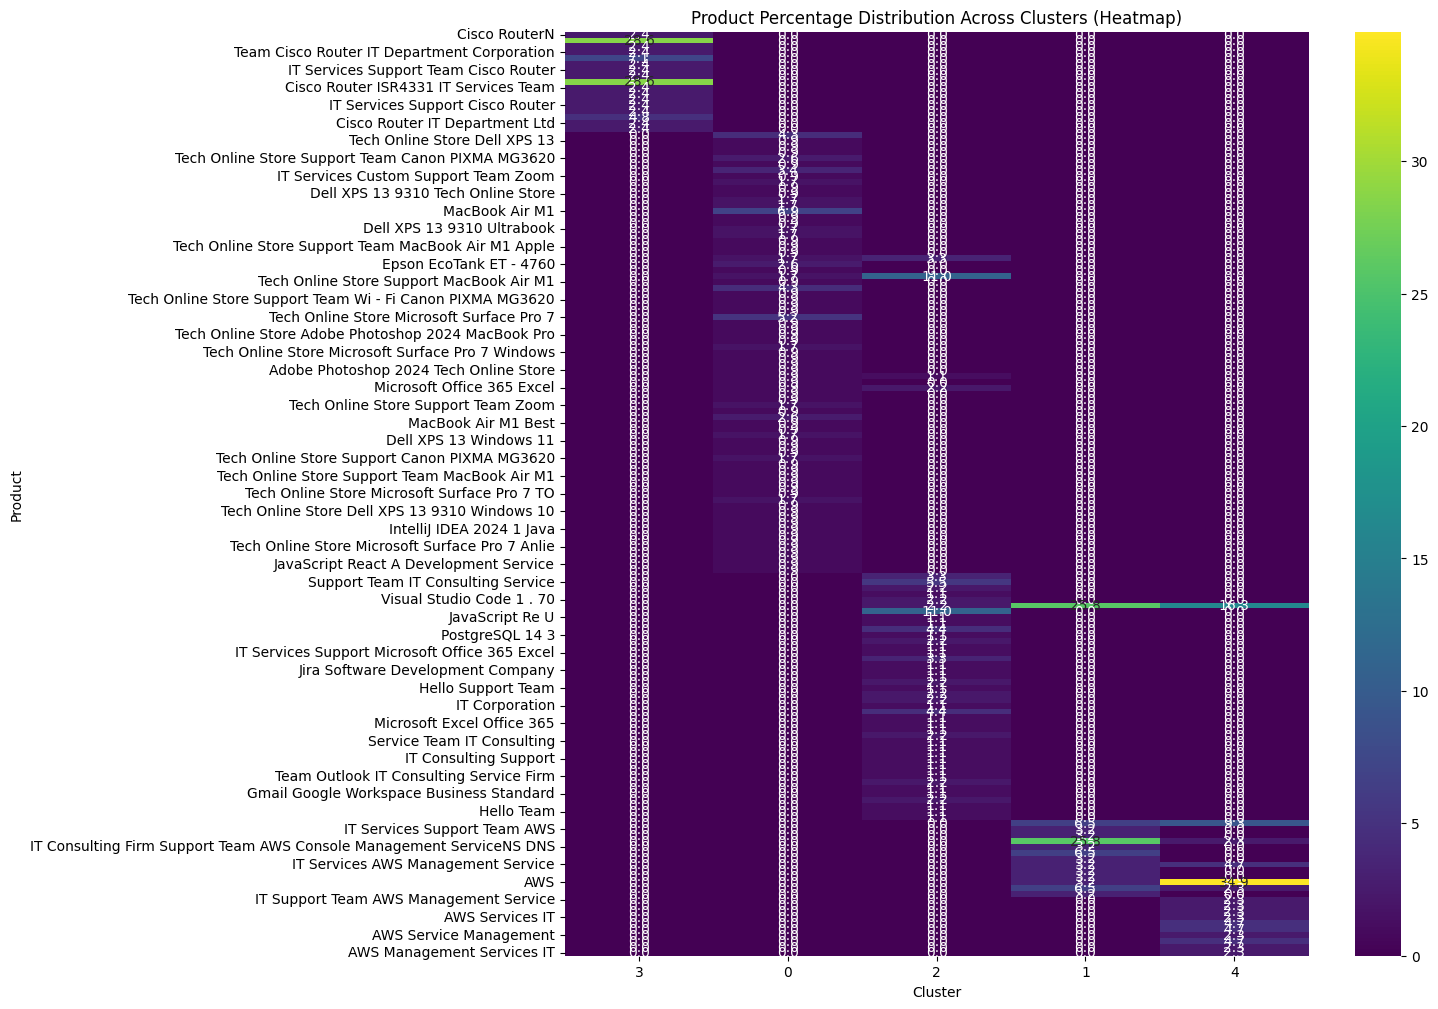

In [ ]:
# prompt: to calculate and visualize the product percentages across clusters using bar plots or heatmaps to represent product occurrences in different clusters.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cluster_product_percentages is defined as in the previous code

for cluster_num, product_percentages in sorted_clusters:
    products = list(product_percentages.keys())
    percentages = list(product_percentages.values())

    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.bar(products, percentages)
    plt.xlabel("Products")
    plt.ylabel("Percentage (%)")
    plt.title(f"Product Percentages in Cluster {cluster_num}")
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


# Heatmap visualization
product_percentage_df = pd.DataFrame(cluster_product_percentages).fillna(0)  # Fill NaN with 0
plt.figure(figsize=(12, 12))
sns.heatmap(product_percentage_df, annot=True, fmt=".1f", cmap="viridis")
plt.xlabel("Cluster")
plt.ylabel("Product")
plt.title("Product Percentage Distribution Across Clusters (Heatmap)")
plt.show()

In [ ]:
# prompt: make function for making dependency parser ui graph of body of row

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

def dependency_parser_ui(text):
  """
  Generates a dependency parse visualization for the given text.

  Args:
      text: The input text to analyze.

  Returns:
      None. Displays the dependency parse visualization in the notebook.
  """
  doc = nlp(text)
  displacy.render(doc, style="dep", jupyter=True, options={"distance": 120})

# Example usage (assuming df_with_prouct_name is defined):
# for index, row in df_with_prouct_name.head(2).iterrows():
#  dependency_parser_ui(row["body"])

In [ ]:
df_with_prouct_name = df_en.loc[df_en["products_ner_bert_large"].map(len) > 1, :]

In [ ]:
df_with_prouct_name.sample(n=10).loc[:, ["subject", "products_ner_bert_large", "body"]].values

array([['Inquiry About Epson EcoTank ET-4760 Printer', 'Epson EcoTk',
        'Hello Customer Support,\n\n\nI hope this message finds you well. I am writing to inquire about the features and the current availability of the Epson EcoTank ET-4760 printer in your online store. I have heard positive reviews regarding its performance and would like to know more about its functionalities including wireless printing, scanning capabilities, and any other special features that it may offer. Additionally, please let me know if there are any ongoing promotions or discounts that might be available for this product. Could you also confirm its stock status and expected delivery times if I decide to make a purchase?\n\n\nThank you for your assistance. I look forward to your prompt response.\n\n\nBest regards,\n\n\n<name>'],
       ['Touchscreen and Keyboard Issues with Surface Pro 7',
        'Surface Pro 7',
        'Dear Tech Online Store Customer Support,\n\n\nI hope this message finds you well. I

In [ ]:
def extract_issues(data):
    stop_verbs = {"write", "say", "report", "request", "concern", "purchase"}  # Uninformative verbs to skip
    extracted_issues = []

    for entry in data:
        doc = nlp(entry["body"])
        product = entry["products_ner_bert_large"]
        issues = []

        for sent in doc.sents:
            # Check if the product is mentioned in the sentence
            if product.lower() in sent.text.lower():
                # Start with the main ROOT of the sentence
                root_token = sent.root

                # Skip generic verbs and search for better alternatives
                if root_token.lemma_ in stop_verbs:
                    # Look for alternative verbs or nouns in the subtree
                    for child in root_token.children:
                        if child.pos_ in {"VERB"}: # , "NOUN"
                            root_token = child
                            break  # Take the first meaningful token

                # Capture the issue if the token is meaningful
                if root_token.pos_ in {"VERB"}: # , "NOUN"
                    issue = {
                        "verb": root_token.lemma_,
                        "description": " ".join([token.text for token in root_token.subtree]),
                    }
                    issues.append(issue)

        extracted_issues.append({"product": product, "issues": issues})

    return extracted_issues

In [ ]:
df_en["body"].str.lower().map(lambda x: "experienc" in x).sum() / df_en.shape[0] * 100

41.00294985250738

In [ ]:
for itr, row in df_with_prouct_name.sample(n=10).iterrows():
    issues = extract_issues([row])
    print(issues)
    for issue_data in issues[0]["issues"]:
        dependency_parser_ui(issue_data["description"])

[{'product': 'AWS', 'issues': [{'verb': 'provide', 'description': 'Please provide updates on AWS usage and cost advisory .'}]}]


[{'product': 'Canon PIXMA', 'issues': [{'verb': 'seek', 'description': "to seek assistance regarding a recurring issue with my Canon PIXMA MG3620 wireless printer , which I 've been experiencing poor print quality lately"}]}]


[{'product': 'Dell XPS 13', 'issues': [{'verb': 'report', 'description': 'to report an issue with my Dell XPS 13 9310 , which is not powering on after a factory reset'}]}]


[{'product': 'HP DeskJet', 'issues': [{'verb': 'report', 'description': 'to report a persistent issue with my HP DeskJet 3755 printer , which frequently experiences paper jams during wireless printing tasks'}]}]


[{'product': 'AWS', 'issues': [{'verb': 'reach', 'description': 'Dear Customer Support Team of IT Services , I am reaching out to highlight an urgent issue regarding a significant AWS service disruption that is severely affecting our cloud systems .'}]}]


[{'product': 'Jira Software', 'issues': [{'verb': 'reach', 'description': 'Dear Tech Online Store Customer Support , \n\n\n I am reaching out for assistance with effectively configuring Jira Software 8.20 for project management using Scrum and integrating it with Confluence .'}]}]


[{'product': 'Surface Pro', 'issues': [{'verb': 'bring', 'description': 'to bring to your attention an issue with my Microsoft Surface Pro 7 , which appears to be detaching from its keyboard unexpectedly'}, {'verb': 'rely', 'description': 'As a valued customer , I rely heavily on my Surface Pro 7 for both personal and business operations due to its versatility and portability .'}]}]


[{'product': 'MacBook Air', 'issues': [{'verb': 'encounter', 'description': 'I am encountering difficulties with the activation process .'}, {'verb': 'look', 'description': "I 'm looking forward to using my new MacBook Air M1 and hope to have this resolved efficiently . \n\n\n"}]}]


[{'product': 'AWS', 'issues': [{'verb': 'reach', 'description': "Hello customer support team , \n\n\n I am reaching out on behalf of < name > regarding our client 's request to scale up their AWS infrastructure during an anticipated high - demand period ."}, {'verb': 'use', 'description': 'We currently use your AWS Management Service and anticipate significant traffic fluctuations , warranting the need for additional resources . \n\n\n'}]}]


[{'product': 'AWS', 'issues': [{'verb': 'inform', 'description': 'to inform you about significant challenges we are experiencing with AWS resource optimization under the AWS Management Service'}]}]


In [ ]:
print(df_en['products_ner_bert_large_by_body'].iloc[0])
print(df_en['issues_comb'].iloc[0])

Cisco RouterN
['issue', 'network', 'outage', 'service', 'issue network outage service']


In [ ]:
#lets automate for cisco router with network issue

In [ ]:
def cisco_network_template(df_en):
    # Assuming df_en is your DataFrame with columns like 'subject', 'body', 'answer', etc.

    # ... (Your existing code for data preprocessing, clustering, etc.) ...

    # Example: Create a new column 'cisco_router_issues' to flag potential Cisco router issues
    df_en['cisco_router_issues'] = df_en['combined_tags'].str.contains('cisco|router|network', case=False, na=False)


    # Analyze issues related to Cisco routers
    cisco_router_tickets = df_en[df_en['cisco_router_issues'] == True]

    if not cisco_router_tickets.empty:
      print("Potential Cisco Router Issues:")
      for index, row in cisco_router_tickets.iterrows():
          print(f"  Ticket ID: {index}")  # Or use a more relevant ID column if available
          print(f"  Subject: {row['subject']}")
          print(f"  Body: {row['body']}")  # consider showing a snippet instead of whole body for better output
          print(f"  Issues Extracted: {row['issues_comb']}")  # Example: Use the 'issues' column you created previously
          print("-" * 20)

    else:
      print("No issues detected for Cisco routers")


    # Add further analysis or visualization for Cisco router issues
    # Example:
    #   - Create a frequency distribution of the extracted issues
    #   - Group the issues by cluster or other categories
    #   - Generate charts or graphs

    return df_en

In [ ]:
df_en = cisco_network_template(df_en)

Potential Cisco Router Issues:
  Ticket ID: 0
  Subject: Urgent: Critical impact on enterprise network connectivity
  Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>
  Issues Extracted: ['issue', 'network', 'outage', 'service', 'issue network outage service']
----------------

<ipython-input-80-7f0ad85509d0>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def name_clusters(cluster_data):
    """
    Names clusters based on the most frequent product names found in subjects.
    """
    cluster_names = {}
    for cluster_id in cluster_data:
        subjects = cluster_data[cluster_id]
        product_counts = {}
        for subject in subjects:
            # Lowercase the subject for case-insensitive matching
            subject = subject.lower()

            if "cisco" in subject and "router" in subject:
                product_counts["Cisco Router"] = product_counts.get("Cisco Router", 0) + 1
            elif "aws" in subject:
                product_counts["AWS"] = product_counts.get("AWS", 0) + 1
            elif "dell xps" in subject:
                product_counts["Dell XPS"] = product_counts.get("Dell XPS", 0) + 1
            elif "printer" in subject:
                product_counts["Printer"] = product_counts.get("Printer", 0) + 1
            elif "hp printer" in subject:
                product_counts["HP Printer"] = product_counts.get("HP Printer", 0) + 1
            elif "zoom" in subject:
                product_counts["Zoom"] = product_counts.get("Zoom", 0) + 1
            elif "jira" in subject:
                product_counts["Jira"] = product_counts.get("Jira", 0) + 1
            elif "mysql" in subject:
                product_counts["MySQL"] = product_counts.get("MySQL", 0) + 1
            elif "postgresql" in subject:
                product_counts["PostgreSQL"] = product_counts.get("PostgreSQL", 0) + 1
            elif "visual studio" in subject or "vs code" in subject:
                product_counts["VS Code"] = product_counts.get("VS Code", 0) + 1
            elif "office 365" in subject:
                product_counts["Office 365"] = product_counts.get("Office 365", 0) + 1
            elif "slack" in subject:
                product_counts["Slack"] = product_counts.get("Slack", 0) + 1
            elif "adobe photoshop" in subject:
                product_counts["Adobe Photoshop"] = product_counts.get("Adobe Photoshop", 0) + 1



        if product_counts:
            most_frequent_product = max(product_counts, key=product_counts.get)
            cluster_names[cluster_id] = most_frequent_product
        else:
            cluster_names[cluster_id] = f"Cluster {cluster_id} (Unknown)"
    return cluster_names

In [ ]:
# Group subjects by cluster
clustered_subjects = df_en.groupby('cluster')['subject'].apply(list).to_dict()

# Name clusters using the function
cluster_names = name_clusters(clustered_subjects)

# Print or use the cluster names
for cluster_id, name in cluster_names.items():
    print(f"Cluster {cluster_id}: {name}")

Cluster 0: Dell XPS
Cluster 1: AWS
Cluster 2: Jira
Cluster 3: Cisco Router
Cluster 4: AWS


In [ ]:
def generate_top_issue_responses(df, cluster_names):
    """Generates response templates for the top 2 issues in each cluster."""

    top_issue_responses = {}
    for cluster_id, cluster_name in cluster_names.items():
        cluster_subjects = df[df["cluster"] == cluster_id]["subject"]

         # Refined matching with keyword list
        keywords = cluster_name.lower().split()  # Using the cluster name as base keywords
        matching_subjects = cluster_subjects[
            cluster_subjects.str.lower().apply(lambda x: any(keyword in x for keyword in keywords))
        ]

        if matching_subjects.empty:
            print(f"No subjects found for cluster {cluster_id} ({cluster_name})")
            continue

        # Get top two subjects, handling cases where less than two subjects exist
        top_2_subjects = matching_subjects.value_counts().nlargest(2).index.tolist()

        top_issue_responses[cluster_name] = []

        for subject in top_2_subjects:
            # Find the corresponding answer from 'df_en'
            answers = df[(df["cluster"] == cluster_id) & (df["subject"] == subject)]["answer"]
            if not answers.empty:
              # Use the first answer. Consider more sophisticated selection if needed.
                answer = answers.iloc[0]
                response_template = f"Subject: Re: {subject}\n\n" \
                                     f"Dear Customer,\n\n" \
                                     f"Thank you for contacting us regarding {subject}.\n\n" \
                                     f"{answer}\n\n" \
                                     "Best regards,\n" \
                                     f"Support Team"
                top_issue_responses[cluster_name].append({"subject":subject, "response":response_template})
            else:
                print(f"No corresponding answer found for subject: {subject}")

    return top_issue_responses

top_responses = generate_top_issue_responses(df_en, cluster_names)

for cluster, issues in top_responses.items():
    print(f"\nCluster: {cluster}")
    for issue_data in issues:
        print(issue_data["subject"])
        print(issue_data["response"])


Cluster: Dell XPS
Intermittent Cursor Freezing Issue on Dell XPS
Subject: Re: Intermittent Cursor Freezing Issue on Dell XPS

Dear Customer,

Thank you for contacting us regarding Intermittent Cursor Freezing Issue on Dell XPS.

Dear <name>,


Thank you for reaching out regarding the intermittent cursor freezing issue on your Dell XPS 13 9310. As you have already updated all drivers and software, we recommend trying the following additional steps: 


1. Run the Dell SupportAssist tool for any hardware diagnostics.
2. Ensure your operating system is fully updated.
3. Consider performing a clean boot to rule out software conflicts.
4. Disconnect any external devices to check if one may be causing the issue.


If the problem persists after these diagnostics, please get back to us so we can explore further assistance or discuss warranty options, including a possible replacement. 


We value your productivity and aim to resolve this issue promptly.


Best regards,
Customer Support Team

Be

In [ ]:
def automated_response(incoming_issue):
    incoming_subject = incoming_issue["subject"].lower()
    incoming_body = incoming_issue["body"].lower()

    best_match = None
    best_response = None
    best_similarity = -1

    for cluster, issues in top_responses.items():
        for issue_data in issues:
            subject = issue_data["subject"].lower()

            # Refined Cluster Matching (check if keywords in the subject or body)
            if any(keyword in incoming_subject for keyword in cluster.lower().split()) or \
               any(keyword in incoming_body for keyword in cluster.lower().split()):
                similarity = 1  # Set high similarity for cluster match
                if similarity > best_similarity:
                    best_similarity = similarity
                    best_match = issue_data["subject"]
                    best_response = issue_data["response"]

            else:  # Subject matching
                similarity = 0
                if subject in incoming_subject:
                    similarity = 0.8
                elif subject in incoming_body:
                    similarity = 0.8

                if similarity > best_similarity:
                    best_similarity = similarity
                    best_match = issue_data["subject"]
                    best_response = issue_data["response"]

    if best_response:
        return best_response
    else:
        return "Try contacting Customer Support Team!"

incoming_issue = {"subject":"Critical impact on enterprise network connectivity", "body":" Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, , IT Manager at  "}
response = automated_response(incoming_issue)
print(response)

Subject: Re: Urgent: Cisco Router ISR4331 Network Connectivity Issues

Dear Customer,

Thank you for contacting us regarding Urgent: Cisco Router ISR4331 Network Connectivity Issues.

Dear <name>,


Thank you for reaching out to us regarding the connectivity issues with your Cisco Router ISR4331. We understand the importance of reliable network performance and we are here to help.


Based on the information you provided, you've already taken significant steps to troubleshoot the issue. We recommend checking these additional points:


1. **Check Cables and Connections**: Ensure that all cables are securely connected and undamaged.
2. **Check Router Placement**: Place your router in a central location, free from obstructions, to improve signal strength.
3. **Disable QoS**: Sometimes disabling Quality of Service (QoS) can stabilize speeds.
4. **Check for Interference**: Consider potential interference from other electronic devices and try changing the wireless channel.


If these don't im

In [ ]:
def calculate_percentages(df_en):
    """Calculates and prints the percentage coverage of categories, products, and issues."""

    # Assuming 'df_en' is your DataFrame and 'cluster_names' is already defined
    cluster_counts = df_en['cluster'].value_counts(normalize=True) * 100

    print("Percentage Coverage of Clusters:")
    for cluster_id, percentage in cluster_counts.items():
        cluster_name = cluster_names.get(cluster_id, f"Cluster {cluster_id}")  # Handle missing names
        print(f"- {cluster_name}: {percentage:.2f}%")

    # Product percentages (replace with your actual product identification method)
    product_counts = {}
    for cluster_id, cluster_name in cluster_names.items():
        product_counts[cluster_name] = product_counts.get(cluster_name, 0) + cluster_counts.get(cluster_id, 0)  # Handle cases where a cluster might not be in cluster_names

    print("\nPercentage Coverage of Products:")
    for product, percentage in product_counts.items():
        print(f"- {product}: {percentage:.2f}%")

    # Assuming you have an 'issue' column or a method to identify issues
    # Example: issue_counts = df_en['issue'].value_counts(normalize=True) * 100



calculate_percentages(df_en)

Percentage Coverage of Clusters:
- Dell XPS: 35.69%
- Jira: 29.79%
- Cisco Router: 12.68%
- AWS: 12.68%
- AWS: 9.14%

Percentage Coverage of Products:
- Dell XPS: 35.69%
- AWS: 21.83%
- Jira: 29.79%
- Cisco Router: 12.68%


In [ ]:
def calculate_top_issues_with_percentages(df_en, cluster_names):
    """Calculates and prints the top recurring issues with their percentages for each cluster."""

    top_issue_percentages = {}

    for cluster_id, cluster_name in cluster_names.items():
      # Filter data for the current cluster
      cluster_data = df_en[df_en['cluster'] == cluster_id]

      if cluster_data.empty:
          print(f"No data for cluster {cluster_id} ({cluster_name})")
          continue

      # Calculate issue percentages for the current cluster
      subject_counts = cluster_data['subject'].value_counts(normalize=True) * 100

      # Store top issues and percentages
      top_issue_percentages[cluster_name] = subject_counts.head(5) # Get top 5

    return top_issue_percentages


# Example usage (assuming df_en and cluster_names are defined):
top_issues_percentages = calculate_top_issues_with_percentages(df_en, cluster_names)


# Print the top recurring issues and percentages for each cluster
for cluster_name, issue_percentages in top_issues_percentages.items():
    print(f"\nCluster: {cluster_name}")
    for issue, percentage in issue_percentages.items():
        print(f"- {issue}: {percentage:.2f}%")


Cluster: Dell XPS
- Intermittent Cursor Freezing Issue on Dell XPS: 0.83%
- Recurrent Excel Crash Issue Post Update: 0.83%
- Help Needed: Printer Connection Problem: 0.83%
- Assistance with Printer Setup: 0.83%
- Printer Settings Update Request: 0.83%

Cluster: AWS
- Issues with AWS Resource Optimization: 2.33%
- Modification Request: AWS Cost Optimization Strategy: 2.33%
- Critical AWS Cost Enhancement: 2.33%
- Assistance with AWS Management: 2.33%
- Urgent AWS Support Needed: 2.33%

Cluster: Jira
- Request for Server Administration Assistance: 0.99%
- Urgent: Immediate IT Assistance Needed: 0.99%
- Upgrade Zoom Request: 0.99%
- Gmail Syncing Issue: 0.99%
- New Jira Project Setup: 0.99%

Cluster: Cisco Router
- Urgent: Critical impact on enterprise network connectivity: 2.33%
- Issues with Cisco Router ISR4331: 2.33%
- Intermittent Connectivity Issues Report: 2.33%
- Issues with Cisco ISR4331 Router: 2.33%
- Urgent: Cisco ISR4331 Issues: 2.33%
